In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

The purpose of this Jupyter notebook is to demonstrate simple and multiple linear regression using data on features previously identified during EDA on a dataset of Portugese math students.
To reiterate, 6 of the most relevant variables were selected as decent candidates for trying to predict the student's final test scores (G3) shown below. Additionally, a baseline was established using naive bayes classification. The most highly correlated variables with G3 were the previous tests G1 and G2, which gave R^2 values of .1933 and .4370 respectively (rounded).


In [2]:
df = pd.read_csv('C:\PortugalMathLinearRegression.csv')
df.describe()

,studytime,failures,Dalc,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,2.035443,0.334177,1.481013,5.708861,10.908861,10.713924,10.415190
std,0.839240,0.743651,0.890741,8.003096,3.319195,3.761505,4.581443
min,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,8.000000,9.000000,8.000000
50%,2.000000,0.000000,1.000000,4.000000,11.000000,11.000000,11.000000
75%,2.000000,0.000000,2.000000,8.000000,13.000000,13.000000,14.000000
max,4.000000,3.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [3]:
df.columns

Index(['studytime', 'failures', 'Dalc', 'absences', 'G1', 'G2', 'G3'], dtype='object')

In [4]:
df.isnull().sum()

studytime    0
failures     0
Dalc         0
absences     0
G1           0
G2           0
G3           0
dtype: int64

In [5]:
df.dtypes

studytime    int64
failures     int64
Dalc         int64
absences     int64
G1           int64
G2           int64
G3           int64
dtype: object

It was determined that both G1 and G2 correlate strongly with the target variable, with G1 having slightly more variance. Graphs of both variables are reproduced below in an overlayed fashion to show this.

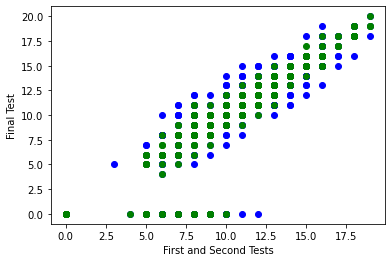

In [6]:
plt.subplot(1,1,1)
plt.plot(df.G1, df.G3, 'bo') #Test 1 in blue
plt.xlabel('First and Second Tests')
plt.ylabel('Final Test')

plt.plot(df.G2, df.G3, 'go') #Test 2 in green

Intuitively, G2 seems to make a better predictor than G1, but both will be tested for thoroughness and as a sanity check.
After preparing the data frames I declare some dummy variables for the sake of legibility and split the data into testing and training sets.

In [7]:
singleVarG1_df = pd.DataFrame(df, columns = ['G1'])
singleVarG2_df = pd.DataFrame(df, columns = ['G2'])
Y = df.G3
X1_train, X1_test, Y1_train, Y1_test = train_test_split(singleVarG1_df, Y , test_size = 0.2, random_state = 1)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(singleVarG2_df, Y , test_size = 0.2, random_state = 1)

Now it's time to initialize, train, then compare the scores of both models. 

In [8]:
linearModel = linear_model.LinearRegression()

modelG1 = linearModel.fit(X1_train,Y1_train)
prediction1Var = linearModel.predict(X1_test)

modelG2 = linearModel.fit(X2_train,Y2_train)
prediction1Var = linearModel.predict(X2_test)

print("First test predictor:", modelG1.score(X1_test,Y1_test), "\nSecond test predictor:", modelG2.score(X2_test,Y2_test))

First test predictor: 0.6110950109682678 
Second test predictor: 0.7818848166971014


No surprises so far, but perhaps using multiple variables will yield improved results. Since G1 and G2 are correlated it's unlikely that the improvement will be significant (indeed the added variance may decrease accuracy), but will be a stepping stone to further improvements.

In [10]:
collegeAdmit2Vars_df = pd.DataFrame(df, columns = ['G1','G2'])

X3_train, X3_test, Y3_train, Y3_test = train_test_split(collegeAdmit2Vars_df, Y, test_size = 0.2, random_state = 1)

model2Vars = linearModel.fit(X3_train, Y3_train)

prediction2Vars = linearModel.predict(X3_test)

model2Vars.score(X3_test, Y3_test)

0.7818293776583642

So adding the first and second tests to the model together actually increased the error slightly. Now it's time to test the other factors along with G2 to see if they can increase the predictive power of the model. Since the data here is so small it's computationally feasible to simply run linear regression analysis for G2 and the remaining factors iteratively. 

In [11]:
for i in df.columns.drop(['G3','G2']):
    collegeAdmit2Vars_df = pd.DataFrame(df, columns = [i,'G2'])
    X3_train, X3_test, Y3_train, Y3_test = train_test_split(collegeAdmit2Vars_df, Y, test_size = 0.2, random_state = 1)
    model2Vars = linearModel.fit(X3_train, Y3_train)
    prediction2Vars = linearModel.predict(X3_test)
    model2Vars.score(X3_test, Y3_test)
    print(i, model2Vars.score(X3_test, Y3_test))

studytime 0.7835264565029839
failures 0.788630621982889
Dalc 0.7816191522818516
absences 0.7908396200419918
G1 0.7818293776583642


It appears that combining G2 with the student's total absences provides the largest increase in accuracy. While it's possible to continue in this manner for 3,4,5, and 6 variables, these increases will likely be marginal at best. Instead, let's train a model using all of the factors and see if the increase is significant:

In [12]:
Xfin_train, Xfin_test, Yfin_train, Yfin_test = train_test_split(df.drop('G3', axis = 1), Y, test_size = 0.2, random_state = 1)
modelAllVars = linearModel.fit(Xfin_train, Yfin_train)
predictionAllVars = linearModel.predict(Xfin_test)
modelAllVars.score(Xfin_test, Yfin_test)

0.7978303683597092

In [13]:
print(metrics.mean_squared_error(Yfin_test, predictionAllVars))

2.7640323648997684


The increase for using all variables compared to only using G2 was ~.016 or 1.6%. This indicates that while Naive Bayes classification was insufficient for the task, simple linear regression was sufficient and multiple linear regression was unnecessary. Interestingly, the MSE accounts for 2.76 points of variation on the final tests. Since the mean squared is quite sensitive to outliers, it's possible that this could be improved by dropping them. Particular suspects are evident in the earlier graph where a small trail of 0's is present along the first and second test axis.

In [14]:
(df == 0).sum(axis = 0)

studytime      0
failures     312
Dalc           0
absences     115
G1             0
G2            13
G3            38
dtype: int64

Credit for this dataset goes to UCI Machine Learning.

The data used in this project was sourced from: https://www.kaggle.com/uciml/student-alcohol-consumption